**Name: Ameya Satish Khond  
SJSU ID: 019136845**

# Q1. Gradient Descent Implementation

**1. Batch Gradient Descent**

In [99]:
# a) Load the employee_salary.csv dataset. Display the first 10 rows and calculate basic statistics (mean, std, min, max) for both columns.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('emplyee_salary.csv')

df.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [100]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


# Explanation
The dataset 'employee_salary.csv' consist of 30 rows and 3 columns. The first 10 rows display two columns: 'Experience' (in years) and 'Salary' (in currency).  
The basic statistics show the mean, standard deviation, minimum, and maximum for both columns, offering a summary of the data's distribution.

In [101]:
'''
b) Implement Batch Gradient Descent from scratch to fit a linear regression model
(Salary = m * Experience + b):
Initialize: m = 0, b = 0
Learning rate α = 0.01
Iterations = 1000
'''

X = df['YearsExperience'].values
y = df['Salary'].values

m, b = 0, 0
alpha = 0.01
epochs = 1000
n = len(X)
cost_history = []

for i in range(epochs):
    y_pred = m * X + b
    error = y_pred - y
    cost = (1/n) * np.sum(error**2)
    cost_history.append(cost)
    dm = (2/n) * np.sum(error * X)
    db = (2/n) * np.sum(error)
    m = m - alpha * dm
    b = b - alpha * db

In [102]:
# c) Print the final slope and intercept

print("\nFinal Batch GD slope (m):", m)
print("Final Batch GD intercept (b):", b)


Final Batch GD slope (m): 9504.801321957242
Final Batch GD intercept (b): 24474.557566113308


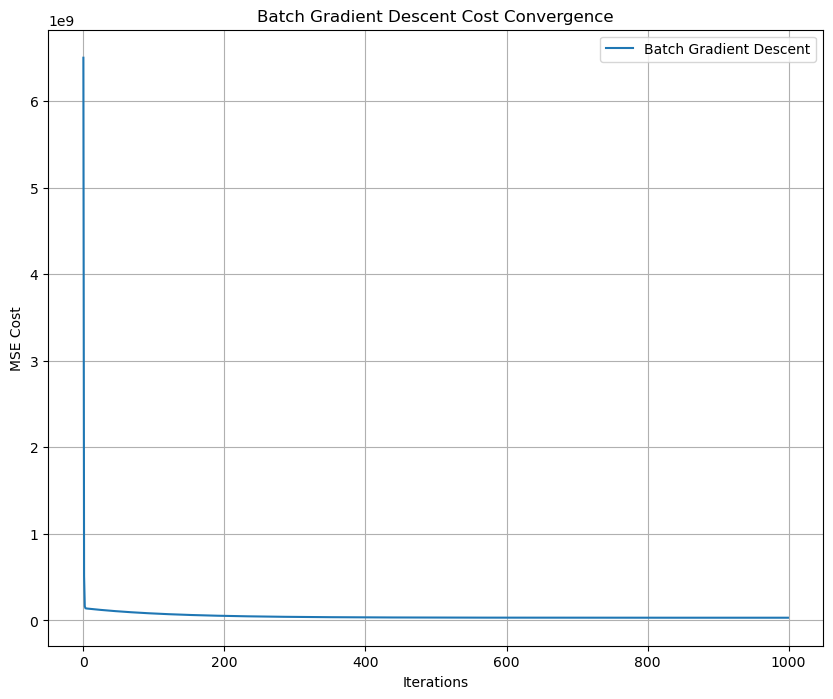

In [134]:
# d) Plot cost vs iterations

plt.figure(figsize=(10, 8))
plt.plot(range(epochs), cost_history, label='Batch Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('MSE Cost')
plt.title('Batch Gradient Descent Cost Convergence')
plt.legend()
plt.grid()
plt.show()

# Explanation
The final slope (m) and intercept (b) values found by Batch Gradient Descent algorithm after 1000 iterations are 9504.80 and 24474.55.  
This plot shows the Mean Squared Error (MSE) at each iteration. As the algorithm runs, the cost steadily decreases, which means the model's predictions are getting progressively better.  
At the end the curve becomes flat which is a sign that the model has reached an optimal solution.

**2. Stochastic Gradient Descent**

In [104]:
'''
a) Implement Stochastic Gradient Descent for the same problem:
Use learning rate α = 0.01
Update parameters using one sample at a time
Run for 1000 epochs
Set random_state = 42
'''

m_sgd = 0
b_sgd = 0
costs_sgd = []
np.random.seed(42)
alpha = 0.01
epochs = 1000

for _ in range(epochs):
    total_cost = 0
    for i in np.random.permutation(n):
        x_i = X[i]
        y_i = y[i]
        y_pred_i = m_sgd * x_i + b_sgd
        error_i = y_pred_i - y_i

        m_sgd -= alpha * 2 * error_i * x_i
        b_sgd -= alpha * 2 * error_i
        total_cost += error_i**2

    costs_sgd.append(total_cost / n)

print("SGD: m =", round(m_sgd, 2), "b =", round(b_sgd, 2))


SGD: m = 9108.01 b = 24789.13


In [105]:
# b) Print the final slope and intercept

print("\nFinal SGD slope (m):", m_sgd)
print("Final SGD intercept (b):", b_sgd)


Final SGD slope (m): 9108.011768134738
Final SGD intercept (b): 24789.134700500756


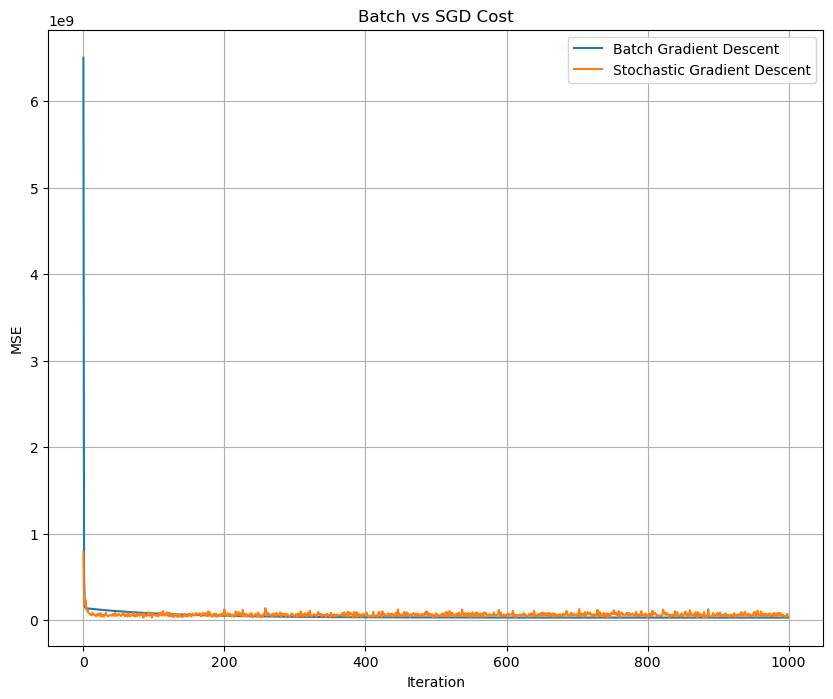

In [135]:
# c) Plot both cost curves (Batch GD and SGD) on the same graph.

plt.figure(figsize=(10, 8))
plt.plot(cost_history, label="Batch Gradient Descent")
plt.plot(costs_sgd, label="Stochastic Gradient Descent")
plt.title("Batch vs SGD Cost")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

   **d) Compare the convergence behavior of both methods. Which converges faster? Which is more stable?**   
    Ans: SGD converges faster initially because it updates parameters more frequently.This is because SGD make  many small updates while BGD makes only one large update per epoch.  
    
    BGD is more stable because its cost curve is a smooth, predictable decline.   
    This is because it uses the entire dataset to compute the gradient,ensuring it always moves in the direction of the true minimum.

**3. Matrix Operations**

In [107]:
# a) Create a matrix A with shape (4, 3) containing random values between 0 and 10. Display the matrix.

A = np.random.rand(4, 3) * 10
print("\nMatrix A:\n", A) 


Matrix A:
 [[5.81038324 2.86636853 7.34115301]
 [5.89139816 0.12727282 9.01644178]
 [5.45643618 8.68627265 8.82736839]
 [4.44966657 5.07659996 4.15754388]]


In [108]:
'''
b) Perform the following matrix operations and display results:
Transpose of A (A)
Compute A * AT(matrix multiplication)
Compute AT * A (matrix multiplication)
Explain the shapes of the resulting matrices and why they differ.
'''

A_T = A.T
print("\nA Transpose:\n", A_T)
print("\nA * A_T:\n", A @ A_T)
print("\nA_T * A:\n", A_T @ A)


A Transpose:
 [[5.81038324 5.89139816 5.45643618 4.44966657]
 [2.86636853 0.12727282 8.68627265 5.07659996]
 [7.34115301 9.01644178 8.82736839 4.15754388]]

A * A_T:
 [[ 95.86914948 100.78717063 121.40510596  70.92684017]
 [100.78717063 116.02099297 112.84301761  64.3471229 ]
 [121.40510596 112.84301761 183.14646114 105.07622451]
 [ 70.92684017  64.3471229  105.07622451  62.85657085]]

A_T * A:
 [[118.04135406  87.38978405 162.44001719]
 [ 87.38978405 109.45546674 119.97311365]
 [162.44001719 119.97311365 230.39635363]]


A : shape (4, 3) means 4 samples, 3 features

AT : transpose ofA, shape (3, 4)  
1. A.AT :
Shape: (4, 3) × (3, 4) = (4, 4)  

2. AT.A : Shape: (3, 4) × (4, 3) = (3, 3)

    **Why They Differ**
The order of multiplication matters in matrix algebra. 
A.AT and AT.A are not the same shape and represent different relationships.  
Think of it like this:  
A.AT : compares rows (samples)  
AT.A : compares columns (features)

In [109]:
'''
c) Create a square matrix B (3x3) with random values. Compute:(4 Points)
Inverse of B (B−1)
Verify that B *B−1 = Identity matrix
Print both matrices and explain what the inverse represents.
'''

B = np.random.rand(3, 3)
B_inv = np.linalg.inv(B)
print("\nMatrix B:\n", B)
print("\nInverse of B:\n", B_inv)
print("\nB * B_inv:\n", B @ B_inv)


Matrix B:
 [[0.44943678 0.89514716 0.78814401]
 [0.12652568 0.61030778 0.99590664]
 [0.5955507  0.78587163 0.76906147]]

Inverse of B:
 [[-3.30067252 -0.72740432  4.32453346]
 [ 5.22357291 -1.30361222 -3.66505377]
 [-2.78175409  1.89539855  1.69659107]]

B * B_inv:
 [[ 1.00000000e+00 -5.08897375e-17  6.66253461e-17]
 [ 2.76623050e-16  1.00000000e+00  7.77862507e-17]
 [ 5.80220616e-16 -1.15440567e-17  1.00000000e+00]]


# Q2. Singular Value Decomposition (SVD) for Movie Recommendations

In [110]:
'''
a) Load the movies.csv and ratings.csv datasets. Display the first 5 rows of each
dataset to understand the structure. How many unique movies and users are in the
ratings data?
'''

import pandas as pd
movies = pd.read_csv("movies.dat", sep="::", engine="python",
                     header=None, names=["Movie ID", "Title", "Genres"], encoding="latin-1")

ratings = pd.read_csv("ratings.dat", sep="::", engine="python",
                      header=None, names=["User ID", "Movie ID", "Rating", "Timestamp"], encoding="latin-1")


In [111]:
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [112]:
ratings.head()

,User ID,Movie ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [113]:
# Count unique movies and users

num_movies = ratings["Movie ID"].nunique()
num_users = ratings["User ID"].nunique()

print("\nUnique Movies:", num_movies)

print("Unique Users:", num_users)



Unique Movies: 3706
Unique Users: 6040


In [114]:
'''
b) Create a user-movie ratings matrix where:
Rows represent Movie IDs
Columns represent User IDs
Values are the ratings
'''

ratings_matrix = ratings.pivot_table(index="Movie ID", columns="User ID", values="Rating", fill_value=0)


In [115]:
'''
c) Fill missing values with 0 (indicating no rating)
You can use: ratings_df.pivot_table(index='Movie ID', columns='User ID',
values='Rating', fill_value=0) Apply Min-Max normalization to scale all ratings
between 0 and 1. Print the shape of the normalized matrix. The expected shape is
(3706, 6040)
'''

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized = scaler.fit_transform(ratings_matrix)
print("Normalized Matrix Shape:", normalized.shape) 


Normalized Matrix Shape: (3706, 6040)


In [116]:
'''
d) Perform Singular Value Decomposition (SVD) on the normalized ratings matrix
to obtain:
U matrix (movie feature vectors)
S matrix (singular values representing importance of each component)
V matrix (user feature vectors)
Print the shapes of U, S, and V. Explain what these matrices represent in the context
of movie recommendations.
'''

import numpy as np
from numpy.linalg import inv, eig, svd

print("\nU = Movie feature vectors")
print("S = Importance of each latent feature")
print("Vt = User feature vectors\n")

U, S, Vt = np.linalg.svd(normalized, full_matrices=False)
print("U shape:", U.shape)      
print("S shape:", S.shape)      
print("Vt shape:", Vt.shape)    



U = Movie feature vectors
S = Importance of each latent feature
Vt = User feature vectors

U shape: (3706, 3706)
S shape: (3706,)
Vt shape: (3706, 6040)


In [117]:
'''
e) The singular values in S are ordered by importance. Select the top 25 components
(largest 25 singular values) to reduce dimensionality while retaining the most
important patterns. This reduces computational cost and removes noise. Print the
sum of the top 25 singular values compared to the sum of all singular values.
What percentage of information do these 25 components capture?
'''

top_k = 25
S_total = np.sum(S)
S_top = np.sum(S[:top_k])
info_retained = (S_top / S_total) * 100

print("\nTop 25 Singular Values Sum:", S_top)
print("Total Singular Values Sum:", S_total)
print("Information Retained (%):", round(info_retained, 2))



Top 25 Singular Values Sum: 1874.698200659423
Total Singular Values Sum: 25779.77205659257
Information Retained (%): 7.27


In [118]:
'''
f) Extract the top 25 eigenvectors (principal components) from the reduced SVD.
These represent the 25 most important latent features in your movie-user
preference space. Verify the shape of your reduced movie representation matrix.
'''

U_reduced = U[:, :top_k]
S_reduced = np.diag(S[:top_k])
movie_features = np.dot(U_reduced, S_reduced)

print("Reduced Movie Feature Matrix Shape:", movie_features.shape) 


Reduced Movie Feature Matrix Shape: (3706, 25)


In [119]:
'''
g) Using the reduced 25-component representation, find the 5 most similar movies
to Movie ID 2025 by (hint : Computing cosine similarity between Movie ID 2025
and all other movies using the reduced feature vectors)
i. Selecting the top 5 movies with highest similarity scores (excluding the
movie itself)
ii. Print the Movie IDs and their similarity scores
'''

from sklearn.metrics.pairwise import cosine_similarity

target_vector = movie_features[2025].reshape(1, -1)
similarities = cosine_similarity(target_vector, movie_features)[0]

similarities[2025] = -1
top_5 = np.argsort(similarities)[-5:][::-1]

print("\nTop 5 Similar Movies to Movie ID 2025:")
for idx in top_5:
    print("Movie ID:", idx, "Similarity Score:", round(similarities[idx], 4))



Top 5 Similar Movies to Movie ID 2025:
Movie ID: 2037 Similarity Score: 0.9216
Movie ID: 3289 Similarity Score: 0.9151
Movie ID: 901 Similarity Score: 0.9028
Movie ID: 3574 Similarity Score: 0.902
Movie ID: 3284 Similarity Score: 0.9003


   **h) Why Cosine Similarity?**  
Cosine similarity measures the angle between two vectors, not their magnitude.

It’s ideal for comparing patterns of preferences, even if users rate on different scales.

It focuses on directional similarity, which is perfect for identifying similar taste profiles.

# Q3. Life Expectancy Prediction 

In [120]:
# a. Load the dataset and present the statistics of data. 

import pandas as pd

df = pd.read_csv("LifeExpectancy.csv")

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [121]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [122]:
# b. Categorize the columns into categorical and continuous.

categorical = df.select_dtypes(include='object').columns.tolist()
continuous = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", categorical)
print("\nContinuous Columns:", continuous)


Categorical Columns: ['Country', 'Status']

Continuous Columns: ['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [123]:
# c. Are there any missing values in the dataset? Mention the approaches to deal with the missing data. Explain the role of Exploratory Data Analysis (EDA) to fill the missing data.

df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

There are no missing values in the dataset.  

**Approaches to Deal With Missing Data:**  
1. Deletion Methods:
- Remove rows with missing values 
- Remove entire columns

2. Filling Missing Data 
- Missing values can be filled using central tendencies such as mean, median, mode and standard deviation.  

    **Role of EDA:**  
    - EDA helps by visualizing distributions, correlations, and spotting patterns to guide imputation.  
    - Identifies the patterns of missing values.
    - Reveals data distribution


In [124]:
# d. Explain what is label encoding and how it changes the dataset. Perform label encoding to the dataset (except Year). Justify your answer.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical:
    if col != "Year":
        df[col] = le.fit_transform(df[col]) 

Label Encoding is a technique used to convert categorical (text) data into numerical values.

**How Does Label Encoding Change the Dataset?**

When you apply label encoding:

    Text columns become numeric
    - All string categories are replaced by integers.

    The dataset becomes ready for machine learning algorithms  
    - Algorithms such as Linear Regression, SVM, KNN, etc., require numeric inputs.  
    
Year is already numeric and represents a real measurable quantity,
so it should be left as-is.

In [125]:
# e. Perform data normalization on 'Population', 'Total expenditure', 'Income composition of resources' numerical columns using StandardScaler(). 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['Population', 'Total expenditure', 'Income composition of resources']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
print("Standard Scaler applied to:", cols_to_scale)

Standard Scaler applied to: ['Population', 'Total expenditure', 'Income composition of resources']


# f. Explain the difference between Min-Max Scaling, Z-Score Normalization, and Robust Scaling.

1. **Min-Max Scaling:** Min–Max Scaling is a normalization technique that transforms all feature values into a fixed range, usually 0 to 1. It does this by subtracting the minimum value of the feature and dividing by the range (max − min). It is very sensitive to outliers.  
2. **Z-Score Normalization:** Z-Score Normalization transforms data so that it has a mean of 0 and a standard deviation of 1. It subtracts the mean of the feature and divides by its standard deviation. Since mean and standard deviation are affected by outliers, Z-score is still influenced by extreme values.
3. **Robust Scaling:** Robust Scaling uses the median and interquartile range (IQR) instead of mean and standard deviation. Because medians and IQR are resistant to the effects of outliers, this scaling method minimizes their influence.

In [126]:
# g. Drop the column 'country' and 'status' from the dataset and split the dataset into training and testing in a 80:20 split. Print the head for the training set. (FYI: Target Variable is Life Expectancy)

from sklearn.model_selection import train_test_split

df.drop(['Country', 'Status'], axis=1, inplace=True)
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
X_train.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
456,2007,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,-0.676606,98.0,0.6,3112.285712,-0.180408,8.1,8.0,-0.138280,11.9
462,2001,152.0,0,3.81,150.743486,92.0,0,22.1,0,91.0,-0.305828,9.0,0.8,1268.884564,-0.181199,9.4,9.3,-0.333302,11.0
2172,2011,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,0.689855,99.0,0.1,1766.947595,-0.163743,4.3,4.3,0.500419,12.9
2667,2013,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,0.556542,98.0,0.1,4199.472530,-0.168779,6.4,6.3,0.437036,14.7
381,2002,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,-1.051549,94.0,0.1,16846.219800,-0.163743,6.7,6.1,0.924592,13.3


In [128]:
# h. Build a linear regression model using the training and testing datasets and compute mean absolute error.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("Linear Regression MAE:", round(mae_lr, 2))

Linear Regression MAE: 2.86


In [129]:
'''
i. Build a linear regression model using stochastic gradient descent with:
alpha = 0.001
learning rate = 'invscaling'
maximum iterations = 500
batch-size = 32
Compute mean absolute error. (Use sklearn)
'''

from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(alpha=0.001, learning_rate='invscaling', max_iter=500)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
print("\nSGD Regression MAE:", round(mae_sgd, 2))



SGD Regression MAE: 3.337724810096441e+16


In [130]:
'''
j. Discuss the above performed methods by applying different learning rates
(constant, invscaling, adaptive). Which is the best learning rate for the model and
why? 
'''

rates = ['constant', 'invscaling', 'adaptive']
for rate in rates:
    model = SGDRegressor(alpha=0.001, learning_rate=rate, max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Learning Rate: {rate} -> MAE: {round(mae, 2)}")

Learning Rate: constant -> MAE: 4.717323434682044e+17
Learning Rate: invscaling -> MAE: 1.5184851647330342e+17
Learning Rate: adaptive -> MAE: 262426249415502.53


# Q4. Low-Rank Adaptation (LoRA) Concepts 

**a. Research and explain the concept of Low-Rank Adaptation (LoRA) in machine learning model fine-tuning. How does it relate to SVD?**  

Low-Rank Adaptation (LoRA) is a modern technique to efficiently fine-tune massive models (like ChatGPT).  
- **The Idea:** Instead of re-training all 175 billion weights of a model (which is slow and expensive), LoRA freezes the original model. It then trains two very small "adapter" matrices (A and B) that represent the change to the weights.  



- **The Relation to SVD:** SVD is the mathematical theory that proves any large matrix can be approximated by multiplying two smaller, "low-rank" matrices. LoRA uses this exact principle, assuming the "change" needed to fine-tune a model is "low-rank" and can be captured by the small A and B matrices.

**b. Explain one advantage of using low-rank decomposition for model adaptation.**

One primary advantage of LoRA is that it significantly reduces computational cost.

- **How it works:** Instead of updating all the massive weight matrices in a large model (which requires huge amounts of memory), low-rank decomposition approximates these changes using two much smaller matrices.

- **Why it matters:** This compression allows you to fine-tune very large models on smaller hardware (like a single GPU) because you are training far fewer parameters, effectively preserving the most important patterns while discarding noise